In [1]:
# Set up
%cd ..
%pip install -r notebooks/notebook_requirements.txt -q
%matplotlib inline

/Users/mariusarlauskas/Desktop/Github/Neptune-Example
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

import plotly.graph_objects as go
import plotly.express as px

from src.data_export import get_data

warnings.filterwarnings('ignore')

# Set pretty plot style
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)


In [3]:
data = get_data()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
TARGET = 'quality'
FEATURES = [col for col in data.columns if col != TARGET]

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().sum() / len(data)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Text(0.5, 1.0, 'Distribution of wine quality')

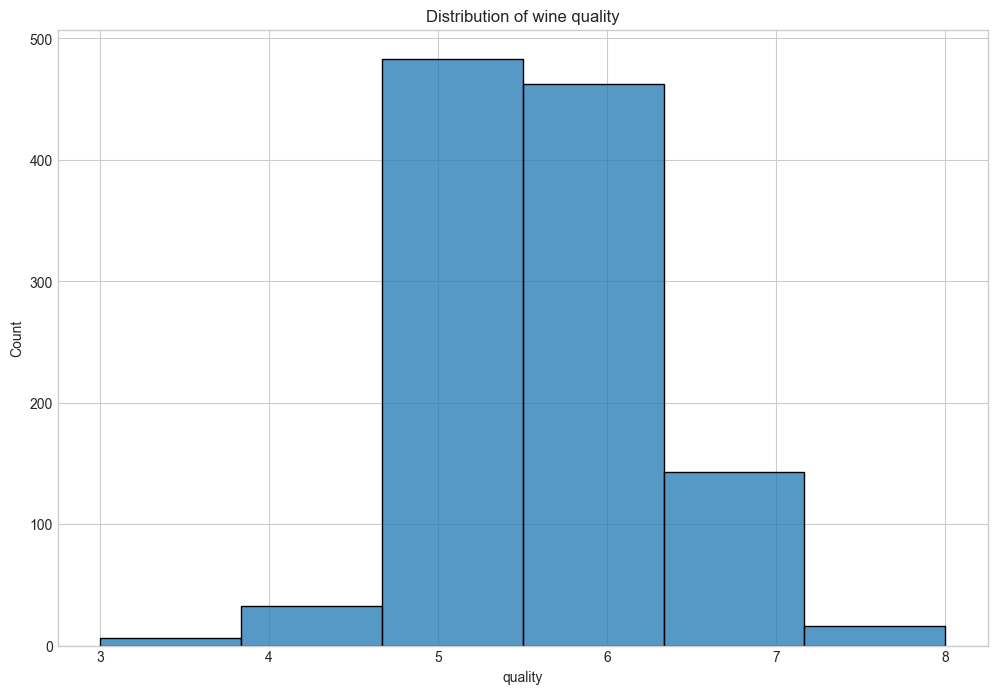

In [7]:
sns.histplot(data[TARGET], bins=6)
plt.title('Distribution of wine quality')

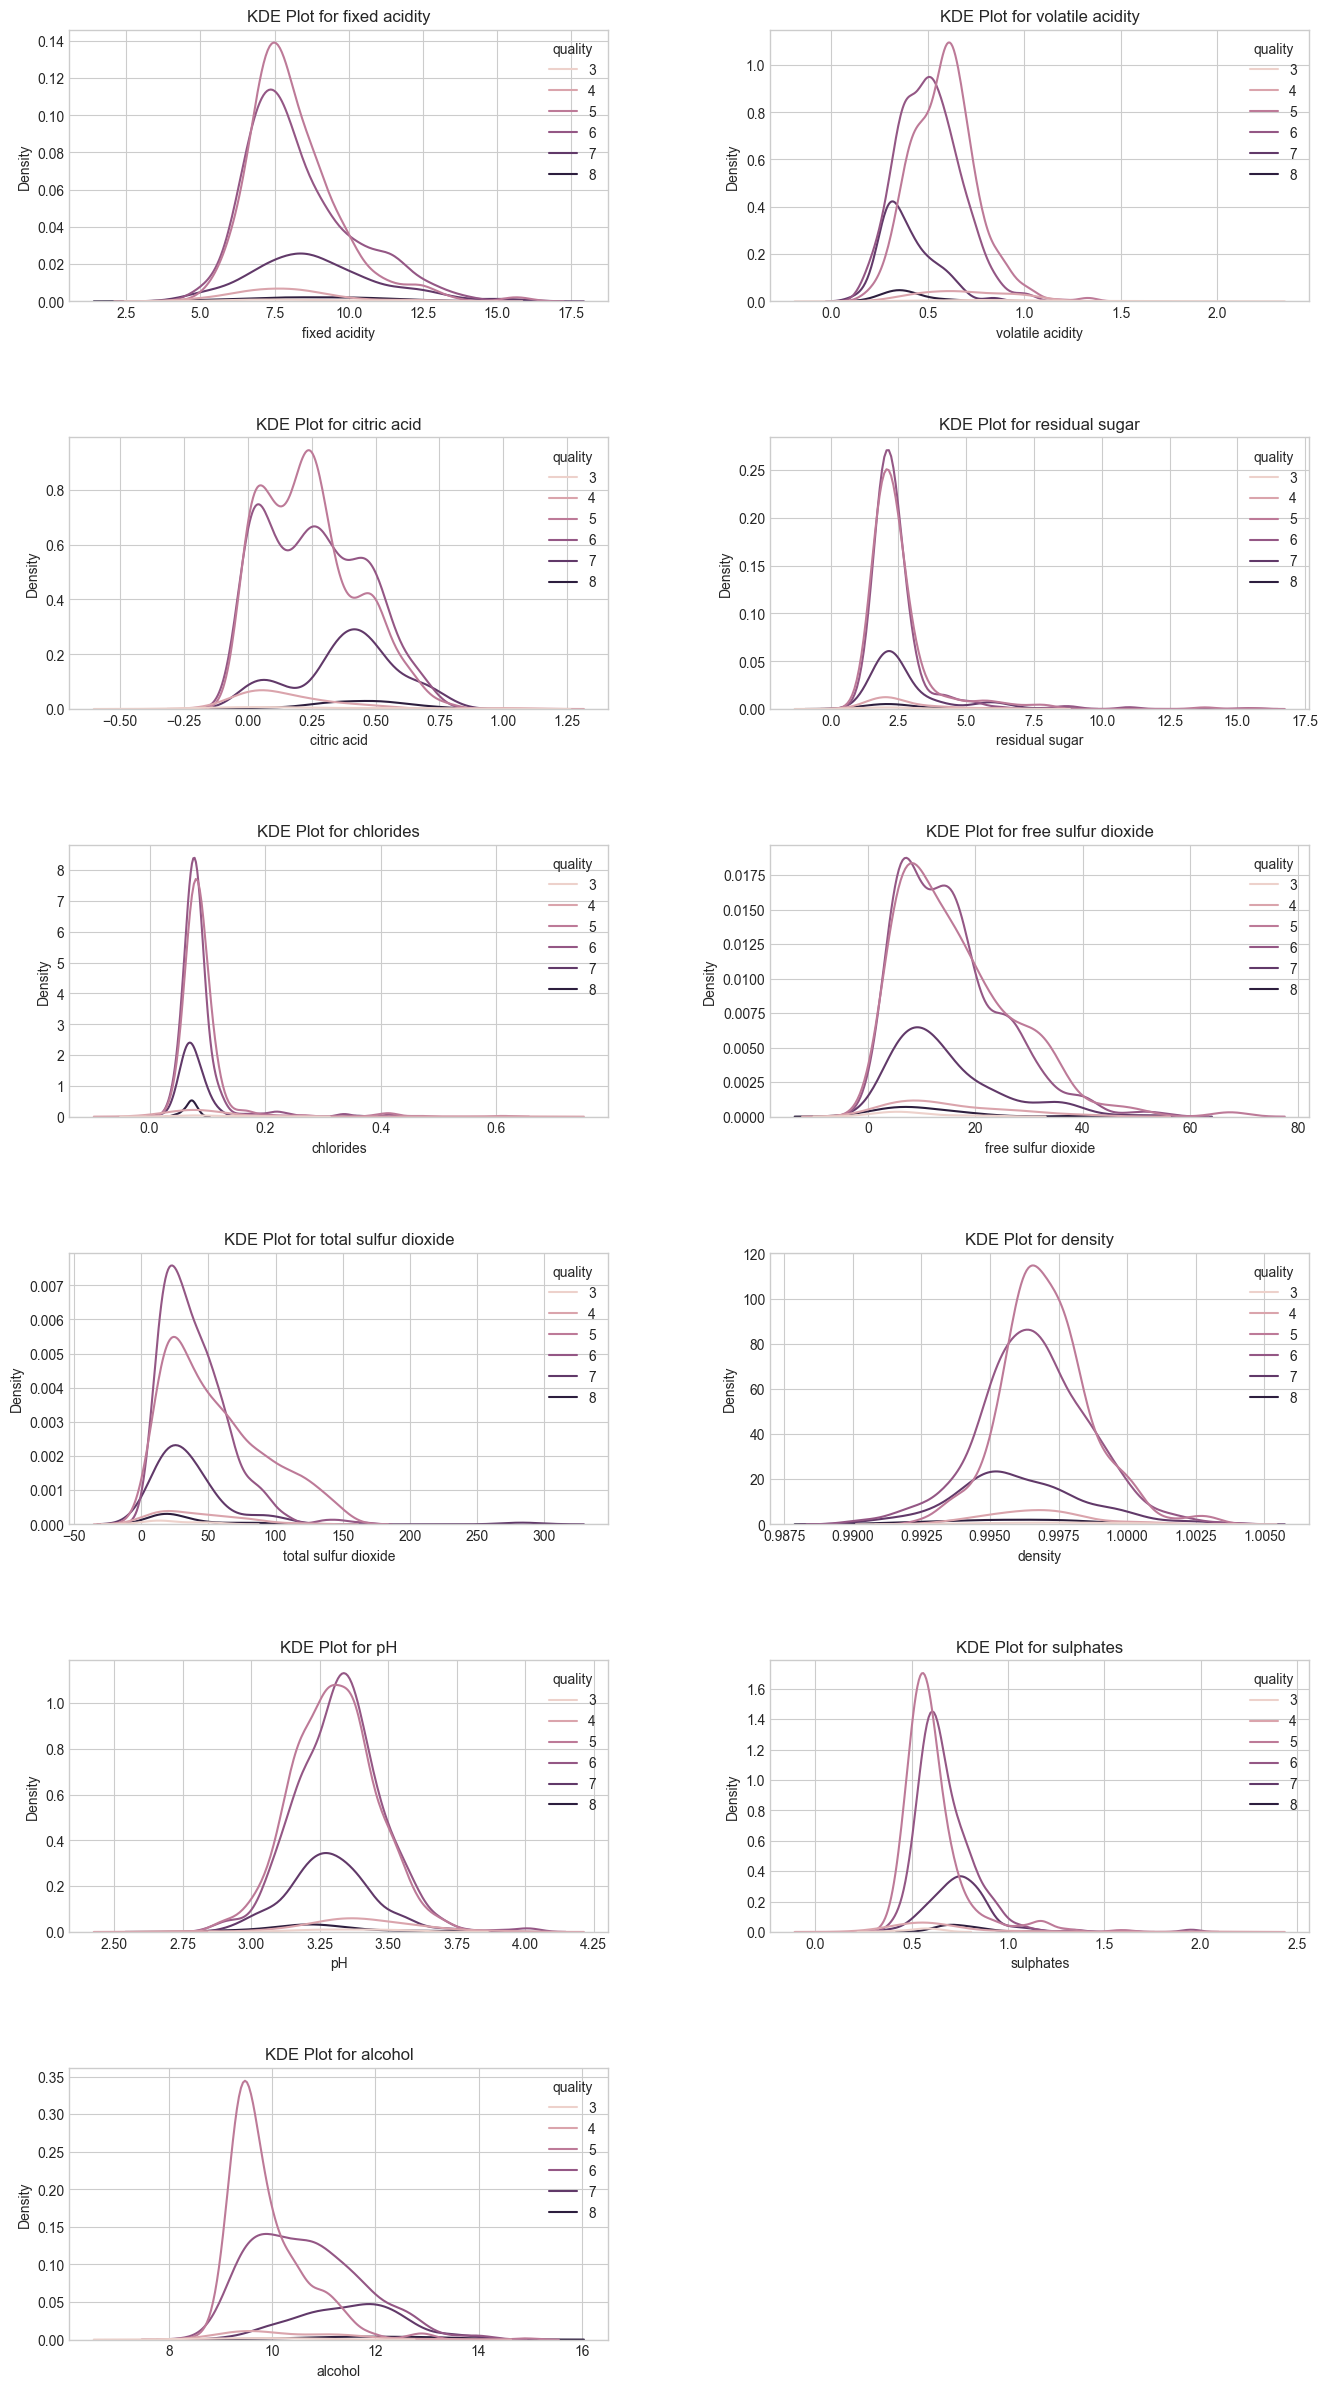

In [8]:
# Calculate the number of rows and columns for the grid based on the number of features
num_features = len(FEATURES)
n_cols = 2  # Number of columns per row
n_rows = math.ceil(num_features / n_cols)  # Calculate the number of rows required

# Create a larger figure with better spacing
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical and horizontal spacing


# Iterate through each numerical feature and create KDE plots
for i, feature in enumerate(FEATURES):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    # Create a KDE plot with hue as the target variable
    sns.kdeplot(data=data, x=feature, hue=TARGET, ax=ax)
    ax.set_title(f'KDE Plot for {feature}')
    
# Handle any remaining empty subplots
if num_features < (n_rows * n_cols):
    for i in range(num_features, n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

# Show the plot
plt.show()

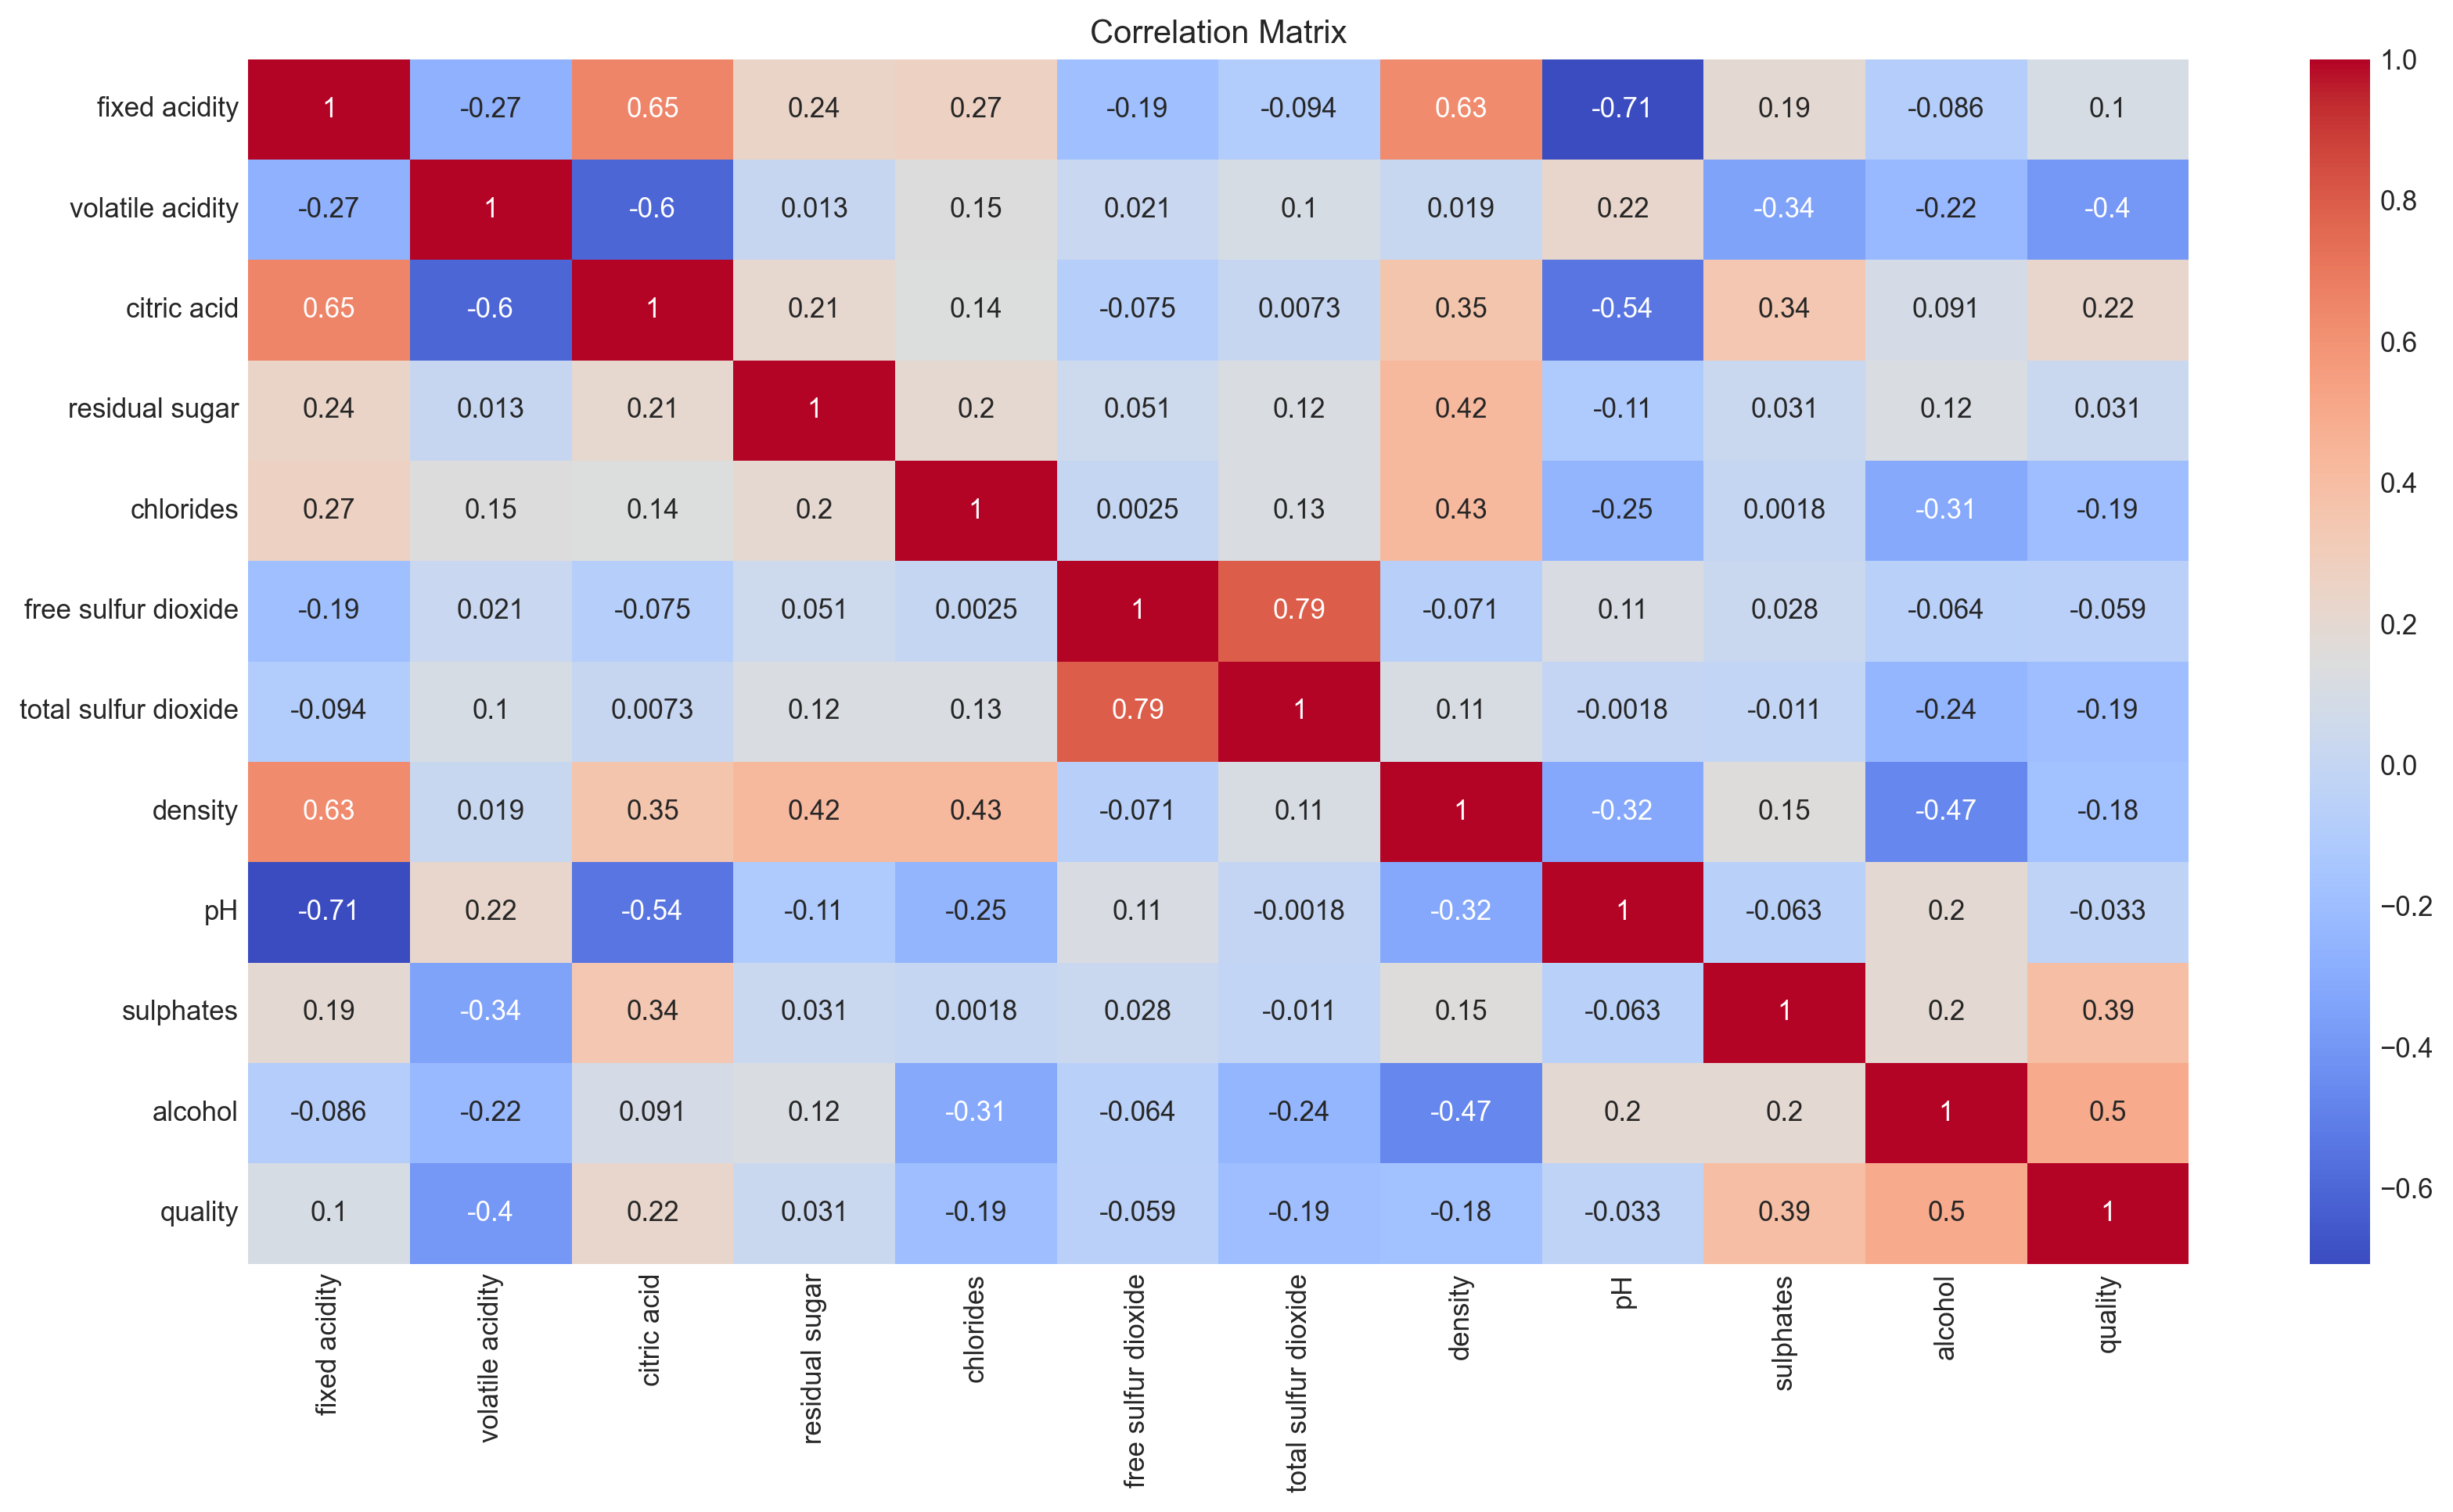

In [9]:
# check for autocorrelation
plt.figure(figsize=(16, 8), dpi=250)
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Plot quality corellation (kendall tau) with other features
corr = data.corr(method='kendall')
corr_quality = corr[TARGET].sort_values(ascending=False)
corr_quality = corr_quality.drop(TARGET)
corr_quality = corr_quality.to_frame()

fig = px.bar(corr_quality, x=corr_quality.index, y=TARGET)
fig.update_layout(title='Quality correlation with other features', xaxis_title='Feature', yaxis_title='Correlation')
fig.show()

In [11]:
data = data.sort_values(by='quality')
fig = px.scatter(data, x="alcohol", y="volatile acidity", animation_frame="quality", size="citric acid", color='sulphates')
# set x and y axes limits
x_min, x_max = data['alcohol'].min(), data['alcohol'].max()
y_min, y_max = data['volatile acidity'].min(), data['volatile acidity'].max()
fig.update_xaxes(range=[x_min, x_max]) 
fig.update_yaxes(range=[y_min, y_max])

In [12]:
# plot boxplots x=quality, y=alcohol
fig = px.box(data, x="quality", y="alcohol")
fig.update_layout(title='Alcohol distribution by quality', xaxis_title='Quality', yaxis_title='Alcohol')
fig.show()

# EDA insights:
- Quality is measured by people who like stronger wines :)
- Citric acid varies a lot between wines
- Higher sulphate content is associated with higher quality, especially for quality == 7, however, on 8 the association is not so clear.
- ph is not a good indicator of quality.
- Quality rating '5' has lots of variation in alcohol content.